In [1]:
import pandas as pd

# Load datasets
products_df = pd.read_csv("PRODUCTS_TAKEHOME.csv")
transactions_df = pd.read_csv("TRANSACTION_TAKEHOME.csv")
users_df = pd.read_csv("USER_TAKEHOME.csv")

# Display first few rows
print("Products Data:")
print(products_df.head())

print("\nTransactions Data:")
print(transactions_df.head())

print("\nUsers Data:")
print(users_df.head())


Products Data:
          CATEGORY_1              CATEGORY_2                   CATEGORY_3  \
0  Health & Wellness           Sexual Health  Conductivity Gels & Lotions   
1             Snacks           Puffed Snacks         Cheese Curls & Puffs   
2  Health & Wellness               Hair Care        Hair Care Accessories   
3  Health & Wellness               Oral Care                   Toothpaste   
4  Health & Wellness  Medicines & Treatments               Essential Oils   

  CATEGORY_4                                       MANUFACTURER  \
0        NaN                                                NaN   
1        NaN                                                NaN   
2        NaN                           PLACEHOLDER MANUFACTURER   
3        NaN                                  COLGATE-PALMOLIVE   
4        NaN  MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...   

             BRAND       BARCODE  
0              NaN  7.964944e+11  
1              NaN  2.327801e+10  
2          ELE

# STANDARDIZING COLUMN FORMATS AND INCORRECT DATA TYPES

In [2]:
# Convert date columns to datetime format
transactions_df["PURCHASE_DATE"] = pd.to_datetime(transactions_df["PURCHASE_DATE"], errors='coerce')
transactions_df["SCAN_DATE"] = pd.to_datetime(transactions_df["SCAN_DATE"], errors='coerce')
users_df["CREATED_DATE"] = pd.to_datetime(users_df["CREATED_DATE"], errors='coerce')
users_df["BIRTH_DATE"] = pd.to_datetime(users_df["BIRTH_DATE"], errors='coerce')

# Drop timezone information to avoid errors
users_df["BIRTH_DATE"] = users_df["BIRTH_DATE"].dt.tz_localize(None)

# Verify changes
print("\nData types after conversion:")
print(users_df.dtypes)



Data types after conversion:
ID                           object
CREATED_DATE    datetime64[ns, UTC]
BIRTH_DATE           datetime64[ns]
STATE                        object
LANGUAGE                     object
GENDER                       object
dtype: object


In [3]:
# Convert 'FINAL_SALE' to numeric, handling missing and erroneous values
transactions_df["FINAL_SALE"] = pd.to_numeric(transactions_df["FINAL_SALE"], errors='coerce')

# Check for missing values
print("\nMissing values in FINAL_SALE:")
print(transactions_df["FINAL_SALE"].isna().sum())



Missing values in FINAL_SALE:
12500


In [4]:
# Replace 'zero' with numeric 0 and convert to float
transactions_df["FINAL_QUANTITY"] = transactions_df["FINAL_QUANTITY"].replace("zero", 0).astype(float)

# Check for missing values
print("\nMissing values in FINAL_QUANTITY:")
print(transactions_df["FINAL_QUANTITY"].isna().sum())



Missing values in FINAL_QUANTITY:
0


# HANDLING MISSING VALUES

In [5]:
import pandas as pd

# Check missing values in the Products table
missing_values = products_df.isna().sum()
missing_values_percentage = (missing_values / len(products_df)) * 100

# Display missing values as a DataFrame
missing_summary = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage (%)": missing_values_percentage
})

# Print the missing summary table
print("\nMissing Values Summary:")
print(missing_summary)





Missing Values Summary:
              Missing Values  Percentage (%)
CATEGORY_1               111        0.013128
CATEGORY_2              1424        0.168411
CATEGORY_3             60566        7.162895
CATEGORY_4            778093       92.021898
MANUFACTURER          226474       26.784160
BRAND                 226472       26.783923
BARCODE                 4025        0.476020


In [6]:
# Fill missing values in category columns with the most common value
for col in ["CATEGORY_1", "CATEGORY_2", "CATEGORY_3", "CATEGORY_4"]:
    products_df[col].fillna(products_df[col].mode()[0], inplace=True)


In [7]:
# Fill missing manufacturer based on most common manufacturer within each CATEGORY_1 group
products_df["MANUFACTURER"] = products_df.groupby("CATEGORY_1")["MANUFACTURER"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))


In [8]:
# Drop rows where BARCODE is missing since it is a unique product identifier
products_df.dropna(subset=["BARCODE"], inplace=True)

# Ensure barcode is numeric
products_df["BARCODE"] = pd.to_numeric(products_df["BARCODE"], errors='coerce')


In [9]:
# Fill missing brands based on the most common brand for that category
products_df["BRAND"] = products_df.groupby("CATEGORY_1")["BRAND"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))


In [10]:


# Check missing values in the Products table
missing_values = products_df.isna().sum()
missing_values_percentage = (missing_values / len(products_df)) * 100

# Display missing values as a DataFrame
missing_summary = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage (%)": missing_values_percentage
})

# Print the missing summary table
print("\nMissing Values Summary:")
print(missing_summary)



Missing Values Summary:
              Missing Values  Percentage (%)
CATEGORY_1                 0             0.0
CATEGORY_2                 0             0.0
CATEGORY_3                 0             0.0
CATEGORY_4                 0             0.0
MANUFACTURER               0             0.0
BRAND                      0             0.0
BARCODE                    0             0.0


In [11]:
# Check missing values in the Transactions table
missing_values_transactions = transactions_df.isna().sum()
missing_values_percentage_transactions = (missing_values_transactions / len(transactions_df)) * 100

# Create a summary DataFrame
missing_summary_transactions = pd.DataFrame({
    "Missing Values": missing_values_transactions,
    "Percentage (%)": missing_values_percentage_transactions
})

# Print missing summary
print("\nMissing Values in Transactions Table:")
print(missing_summary_transactions)



Missing Values in Transactions Table:
                Missing Values  Percentage (%)
RECEIPT_ID                   0           0.000
PURCHASE_DATE                0           0.000
SCAN_DATE                    0           0.000
STORE_NAME                   0           0.000
USER_ID                      0           0.000
BARCODE                   5762          11.524
FINAL_QUANTITY               0           0.000
FINAL_SALE               12500          25.000


In [12]:
# Fill FINAL_SALE missing values with median
transactions_df["FINAL_SALE"].fillna(transactions_df["FINAL_SALE"].median(), inplace=True)

In [13]:
# Drop transactions with missing USER_ID or BARCODE (essential for linking users & products)
transactions_df.dropna(subset=["USER_ID", "BARCODE"], inplace=True)

In [14]:
# Recheck missing values after imputation
missing_values_transactions_after = transactions_df.isna().sum()

# Create summary tables
missing_summary_transactions_after = pd.DataFrame({
    "Missing Values After Imputation": missing_values_transactions_after
})


# Print missing summary after imputation
print("\nMissing Values in Transactions Table (After Imputation):")
print(missing_summary_transactions_after)





Missing Values in Transactions Table (After Imputation):
                Missing Values After Imputation
RECEIPT_ID                                    0
PURCHASE_DATE                                 0
SCAN_DATE                                     0
STORE_NAME                                    0
USER_ID                                       0
BARCODE                                       0
FINAL_QUANTITY                                0
FINAL_SALE                                    0


In [15]:
# Check missing values in the Users table
missing_values_users = users_df.isna().sum()
missing_values_percentage_users = (missing_values_users / len(users_df)) * 100

# Create a summary DataFrame
missing_summary_users = pd.DataFrame({
    "Missing Values": missing_values_users,
    "Percentage (%)": missing_values_percentage_users
})

# Print missing summary
print("\nMissing Values in Users Table:")
print(missing_summary_users)



Missing Values in Users Table:
              Missing Values  Percentage (%)
ID                         0           0.000
CREATED_DATE               0           0.000
BIRTH_DATE              3675           3.675
STATE                   4812           4.812
LANGUAGE               30508          30.508
GENDER                  5892           5.892


In [16]:
# Impute missing BIRTH_DATE by replacing with median birth year
median_birth_year = users_df["BIRTH_DATE"].dropna().dt.year.median()
users_df["BIRTH_DATE"].fillna(pd.to_datetime(f"{int(median_birth_year)}-01-01"), inplace=True)

# Fill missing STATE values with the most common state (mode)
users_df["STATE"].fillna(users_df["STATE"].mode()[0], inplace=True)

# Fill missing LANGUAGE values with the most common language (mode)
users_df["LANGUAGE"].fillna(users_df["LANGUAGE"].mode()[0], inplace=True)


# Fill missing GENDER values with "Not Specified"
users_df["GENDER"].fillna("Not Specified", inplace=True)

In [17]:
# Recheck missing values after imputation
missing_values_users_after = users_df.isna().sum()

# Create summary tables

missing_summary_users_after = pd.DataFrame({
    "Missing Values After Imputation": missing_values_users_after
})

# Print missing summary after imputation
print("\nMissing Values in Users Table (After Imputation):")
print(missing_summary_users_after)



Missing Values in Users Table (After Imputation):
              Missing Values After Imputation
ID                                          0
CREATED_DATE                                0
BIRTH_DATE                                  0
STATE                                       0
LANGUAGE                                    0
GENDER                                      0


In [18]:
# Define the file path where you want to save the cleaned datasets
save_path = r"C:\Users\Harshitha\Documents\Data analysis Projects\FETCH_ASSESMENT"

# Save cleaned datasets as CSV files
products_df.to_csv(f"{save_path}\\Clean_Products.csv", index=False)
transactions_df.to_csv(f"{save_path}\\Clean_Transactions.csv", index=False)
users_df.to_csv(f"{save_path}\\Clean_Users.csv", index=False)

print("Cleaned datasets successfully saved in:", save_path)


Cleaned datasets successfully saved in: C:\Users\Harshitha\Documents\Data analysis Projects\FETCH_ASSESMENT


# KEY VISUALIZATIONS FOR EXAMINING DATA


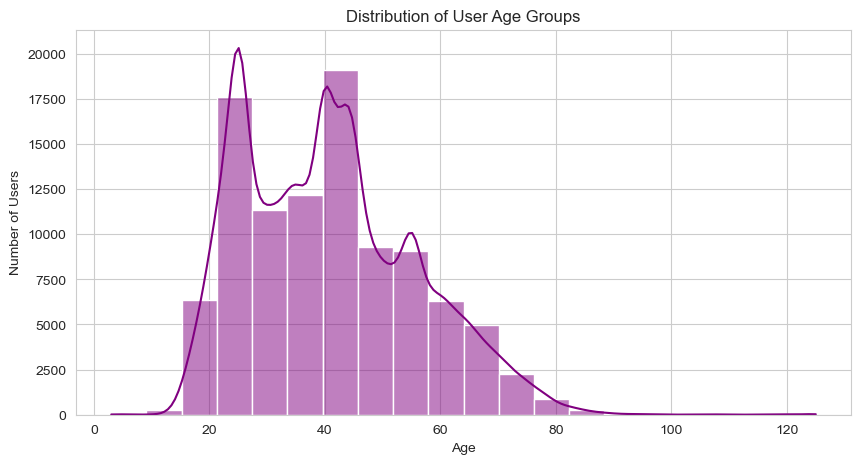

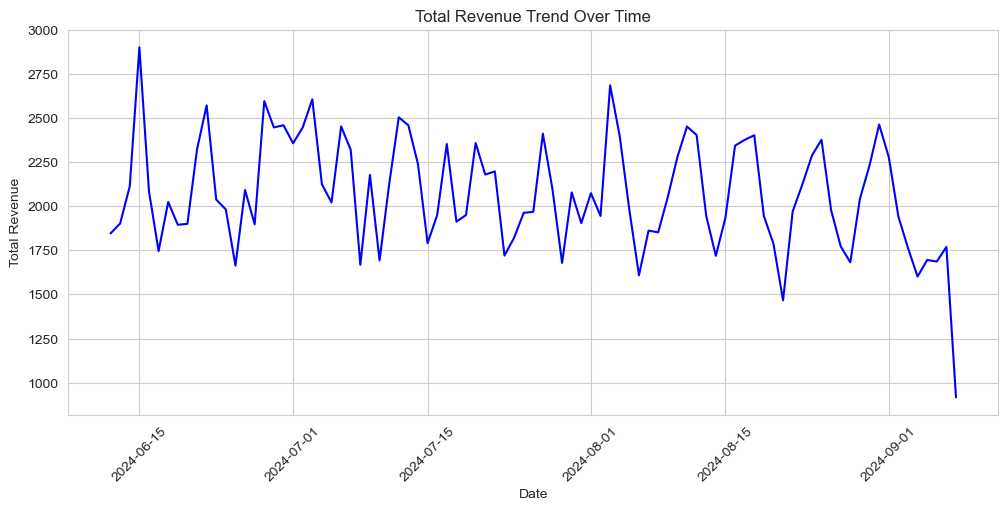

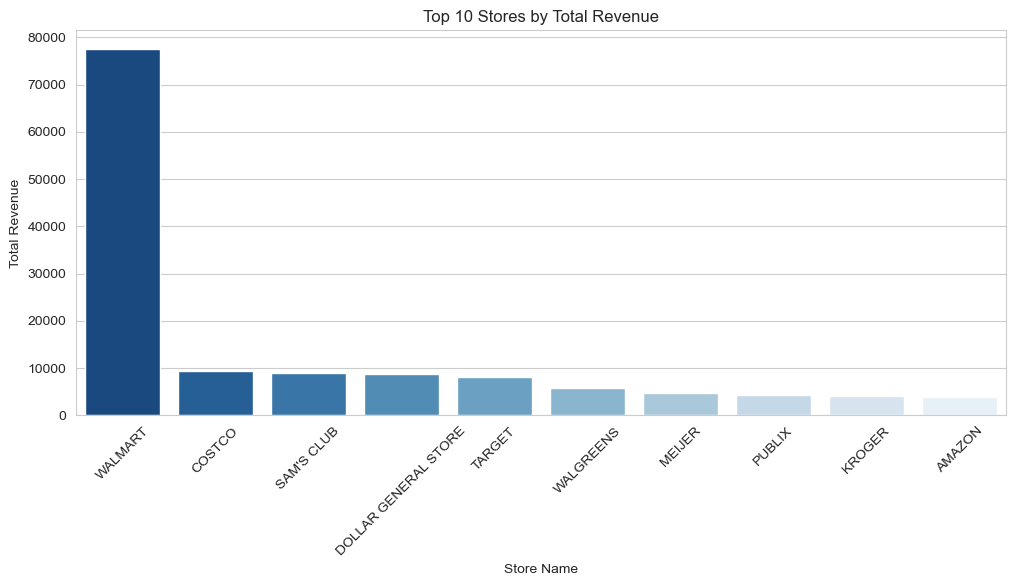

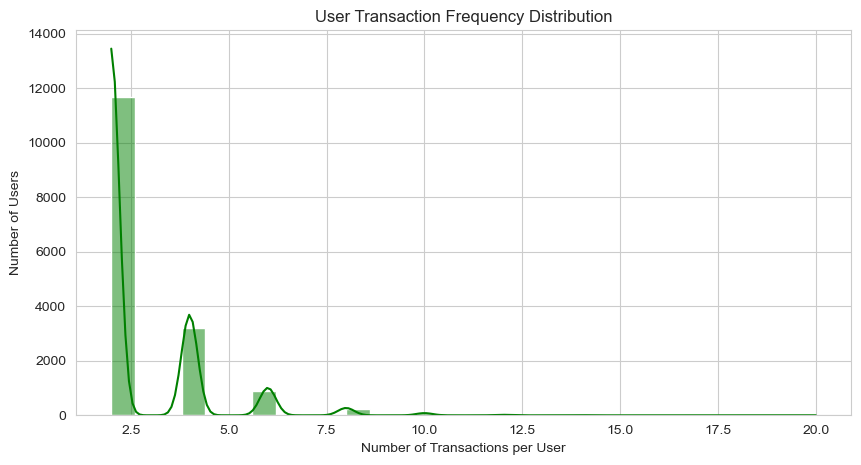

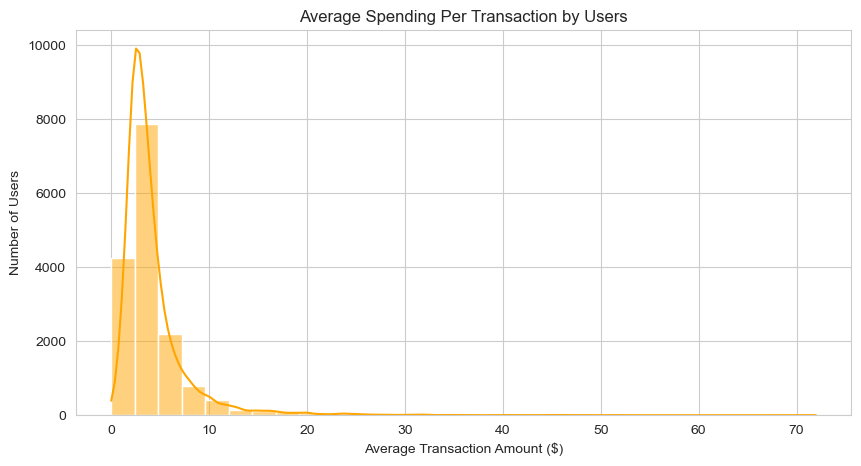

In [19]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Convert date columns to datetime format
users_df["BIRTH_DATE"] = pd.to_datetime(users_df["BIRTH_DATE"])
transactions_df["PURCHASE_DATE"] = pd.to_datetime(transactions_df["PURCHASE_DATE"])

# Calculate user age
current_year = datetime.today().year
users_df["AGE"] = current_year - users_df["BIRTH_DATE"].dt.year

# Merge transactions with users and products for further analysis
transactions_users_df = transactions_df.merge(users_df, left_on="USER_ID", right_on="ID")
merged_df = transactions_users_df.merge(products_df, on="BARCODE", how="left")

# Set seaborn style for better visuals
sns.set_style("whitegrid")

# Distribution of User Age Groups
plt.figure(figsize=(10, 5))
sns.histplot(users_df["AGE"], bins=20, kde=True, color="purple")
plt.title("Distribution of User Age Groups")
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.show()

# Total Revenue Trend Over Time
daily_revenue = transactions_df.groupby("PURCHASE_DATE")["FINAL_SALE"].sum()

plt.figure(figsize=(12, 5))
sns.lineplot(x=daily_revenue.index, y=daily_revenue.values, color="blue")
plt.title("Total Revenue Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

#Store Performance - Top 10 Stores by Total Revenue
store_revenue = transactions_df.groupby("STORE_NAME")["FINAL_SALE"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=store_revenue.index, y=store_revenue.values, palette="Blues_r")
plt.title("Top 10 Stores by Total Revenue")
plt.xlabel("Store Name")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

# User Transaction Frequency Distribution
plt.figure(figsize=(10, 5))
sns.histplot(transactions_df["USER_ID"].value_counts(), bins=30, color="green", kde=True)
plt.title("User Transaction Frequency Distribution")
plt.xlabel("Number of Transactions per User")
plt.ylabel("Number of Users")
plt.show()

# Average Spending Per Transaction by Users
avg_spending_per_transaction = transactions_df.groupby("USER_ID")["FINAL_SALE"].mean()

plt.figure(figsize=(10, 5))
sns.histplot(avg_spending_per_transaction, bins=30, color="orange", kde=True)
plt.title("Average Spending Per Transaction by Users")
plt.xlabel("Average Transaction Amount ($)")
plt.ylabel("Number of Users")
plt.show()



# What are the top 5 brands by receipts scanned among users 21 and over?Solution:
Convert BIRTH_DATE to datetime and calculate age.
Filter users who are 21 and older.
Merge users_df with transactions_df and products_df.
Count the number of receipts scanned per brand for users 21 and over.
Display the top 5 brands.
python
Copy
Edit


In [20]:
from datetime import datetime

# Convert birth date to datetime
users_df["BIRTH_DATE"] = pd.to_datetime(users_df["BIRTH_DATE"])

# Calculate age
current_year = datetime.today().year
users_df["AGE"] = current_year - users_df["BIRTH_DATE"].dt.year

# Filter users 21 and over
users_21_over = users_df[users_df["AGE"] >= 21]

# Merge transactions with users (to filter by age)
transactions_users_df = transactions_df.merge(users_21_over, left_on="USER_ID", right_on="ID")

# Merge transactions with products
merged_df = transactions_users_df.merge(products_df, on="BARCODE", how="left")

# Count receipts per brand
top_brands = merged_df["BRAND"].value_counts().head(5)

# Display results
print("Top 5 Brands by Receipts Scanned Among Users 21 and Over:")
print(top_brands)


Top 5 Brands by Receipts Scanned Among Users 21 and Over:
NERDS CANDY      6
PRIVATE LABEL    6
DOVE             6
HERSHEY'S        4
TRIDENT          4
Name: BRAND, dtype: int64


# Question 2: Who are Fetch’s power users? 
Solution:
Power users are those with the highest number of transactions.
Count transactions per USER_ID.
Display the top 10 most active users.

In [21]:
# Identify power users (users with the most transactions)
power_users = transactions_df["USER_ID"].value_counts().head(10)

# Display results
print("\nTop 10 Power Users (Most Transactions):")
print(power_users)



Top 10 Power Users (Most Transactions):
62925c1be942f00613f7365e    20
64063c8880552327897186a5    18
61d5f5d2c4525a3a478b386b    14
609af341659cf474018831fb    14
6327a07aca87b39d76e03864    14
60a5363facc00d347abadc8e    14
5c8fdcc79d47895c54a6fe22    12
63f1904938f010745b9a2b60    12
66651af0e04f743a096e3bf9    12
5ddbca50ab7b8c53a76aeee3    12
Name: USER_ID, dtype: int64


 # Question 3: What are the top 5 most purchased product categories?Solution:
Sum the FINAL_QUANTITY for each CATEGORY_1.
Sort and display the top 5 categories.

In [22]:
# Get top 5 most purchased product categories
top_categories = (
    merged_df.groupby("CATEGORY_1")["FINAL_QUANTITY"]
    .sum()
    .reset_index()
    .sort_values(by="FINAL_QUANTITY", ascending=False)
    .head(5)
)

# Display results
print("\nTop 5 Most Purchased Product Categories:")
print(top_categories)



Top 5 Most Purchased Product Categories:
          CATEGORY_1  FINAL_QUANTITY
5             Snacks            74.0
3  Health & Wellness            29.0
1          Beverages             4.0
4             Pantry             2.0
0            Alcohol             1.0
